In [2]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [3]:
def pam(X, k):
    n = len(X)
    medoids = np.random.choice(n, k, replace=False)  # Chọn ngẫu nhiên k medoids
    clusters = np.zeros(n)

    for i in range(100):  # Lặp tối đa 100 lần
        distances = pairwise_distances(X, X[medoids])
        clusters = np.argmin(distances, axis=1)  # Gán điểm vào medoid gần nhất

        new_medoids = np.array([np.argmin(np.sum(distances[clusters == j], axis=0)) for j in range(k)])

        # Map new medoids lại với chỉ số của dữ liệu gốc
        new_medoids = medoids[new_medoids]

        if np.all(medoids == new_medoids):  # Dừng nếu không có sự thay đổi
            break
        medoids = new_medoids
    
    return medoids, clusters

In [6]:
def claran(X, k, num_samples=5, num_swaps=5):
    n = len(X)
    best_medoids = np.random.choice(n, k, replace=False)  # Khởi tạo medoids ngẫu nhiên
    best_clusters = np.zeros(n)
    best_cost = float('inf')

    for _ in range(num_samples):
        medoids = best_medoids.copy()
        for _ in range(num_swaps):
            # Thử thay đổi một medoid ngẫu nhiên thành một điểm khác ngẫu nhiên
            new_medoid = np.random.choice(np.setdiff1d(np.arange(n), medoids))
            medoids[np.random.choice(k)] = new_medoid

            # Tính toán khoảng cách và phân cụm
            distances = pairwise_distances(X, X[medoids])
            clusters = np.argmin(distances, axis=1)
            cost = np.sum(np.min(distances, axis=1))

            # Cập nhật medoids tốt nhất nếu chi phí giảm
            if cost < best_cost:
                best_cost = cost
                best_medoids = medoids.copy()
                best_clusters = clusters.copy()

    return best_medoids, best_clusters

In [8]:
def test_claran():
    # Tạo bộ dữ liệu ngẫu nhiên với 3 cụm
    X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

    # Số lượng cụm (số medoids)
    k = 3

    # Chạy thuật toán CLARAN
    medoids, clusters = claran(X, k)

    # Vẽ kết quả
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
    
    # Vẽ các medoids
    plt.scatter(X[medoids, 0], X[medoids, 1], c='red', s=200, alpha=0.75, label='Medoids')
    
    plt.title("Kết quả phân cụm bằng thuật toán CLARAN")
    plt.legend()
    plt.show()

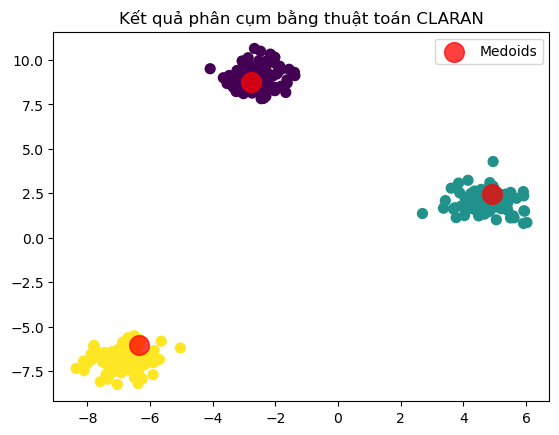

In [10]:
test_claran()